# Reproduce scVI results

In [23]:
cd ../..

/Users/yiningliu


In [24]:
import os

import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

from scvi.dataset import CortexDataset, RetinaDataset, BrainLargeDataset, HematoDataset, CbmcDataset, SyntheticDataset, PbmcDataset, BrainSmallDataset

from scvi.metrics.clustering import entropy_batch_mixing, get_latent
from scvi.metrics.differential_expression import de_stats
from scvi.metrics.imputation import imputation

from scvi.models import VAE, SVAEC

from scvi.inference import VariationalInference

**Import Datasets**

In [25]:
# brainlarge_dataset = BrainLargeDataset()
cortex_dataset = CortexDataset()
hemato_dataset = HematoDataset() 
synthetic_dataset = SyntheticDataset()
retina_dataset = RetinaDataset()
#pbmc_dataset = PbmcDataset()
#cbmc_dataset = CbmcDataset()
#brainsmall_dataset = BrainSmallDataset()

File data/expression.bin already downloaded
Preprocessing Cortex data
Finished preprocessing Cortex data
Preprocessing Hemato data
Finished preprocessing Hemato data
Preprocessing dataset
Finished preprocessing dataset


### Figure 1c. runtime

In [26]:
# BRAIN_LARGE 

### Table 1. log likelihood

In [27]:
# BRAIN_LARGE 

### Figure 2. imputation (Uniform Corruption) 

In [28]:
n_epochs=500
lr=1e-3
use_batches=False
use_cuda=True
# Train the model and output model likelihood every 5 epochs
cortex_vae = VAE(cortex_dataset.nb_genes, n_batch=cortex_dataset.n_batches * use_batches)
cortex_infer = VariationalInference(cortex_vae,
                                 cortex_dataset,
                                 train_size=0.9,
                                 use_cuda=use_cuda,
                                 frequency=5)
cortex_infer.train(n_epochs=n_epochs, lr=lr)


training: 100%|██████████| 500/500 [07:34<00:00,  1.10it/s]


In [ ]:
original_list, imputed_list = cortex_infer.imputation('train', 
                                                   rate=0.09, 
                                                   corruption="uniform", 
                                                   verbose=True)

### Figure 3. interpreting latent space; tsne plot and heatmap

CORTEX

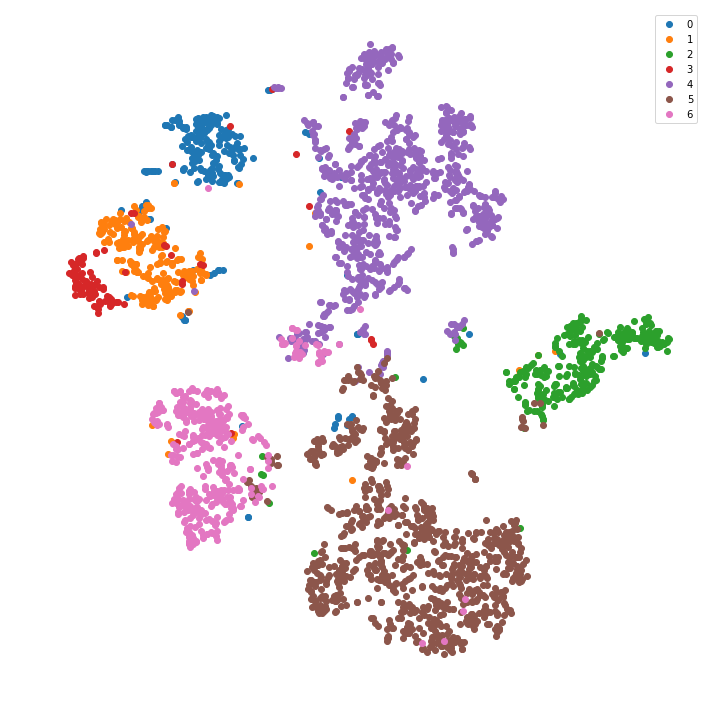

In [30]:
cortex_infer.show_t_sne('sequential', n_samples=False, color_by='labels')

HEMATO

training: 100%|██████████| 500/500 [2:08:20<00:00, 15.40s/it]


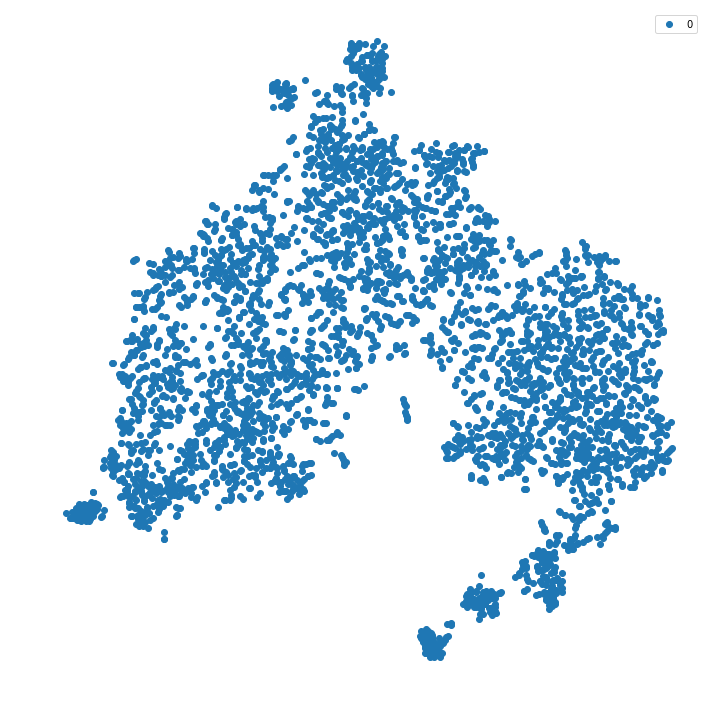

In [32]:
hemato_vae = VAE(hemato_dataset.nb_genes, n_batch=hemato_dataset.n_batches * use_batches)
hemato_infer = VariationalInference(hemato_vae,
                                    hemato_dataset,
                                    train_size=0.9, 
                                    use_cuda=use_cuda, 
                                    frequency=5)
hemato_infer.train(n_epochs=n_epochs, lr=lr)
hemato_infer.show_t_sne('sequential', n_samples=False, color_by='labels')

ZINB 

training: 100%|██████████| 500/500 [00:22<00:00, 22.71it/s]


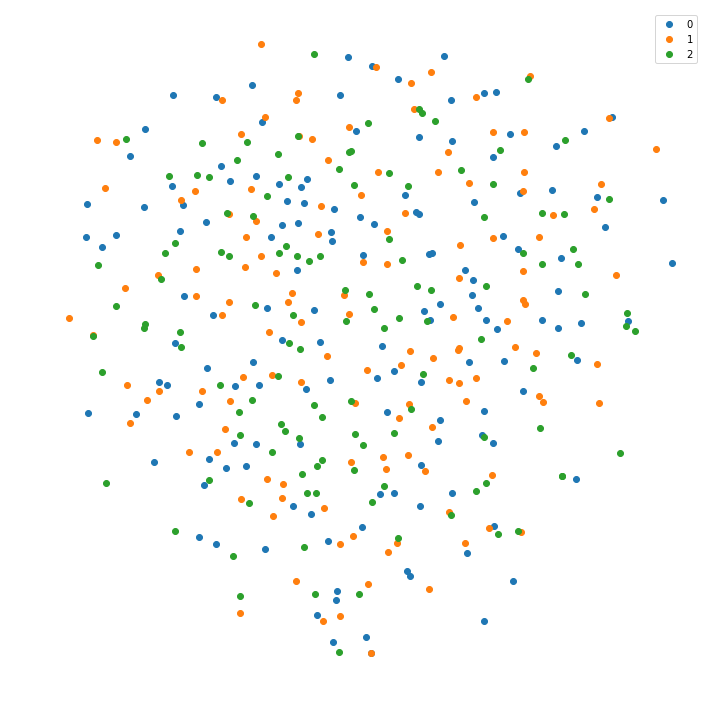

In [33]:
synthetic_vae = VAE(synthetic_dataset.nb_genes, n_batch=synthetic_dataset.n_batches * use_batches)
synthetic_infer = VariationalInference(synthetic_vae, 
                                       synthetic_dataset, 
                                       train_size=0.9, 
                                       use_cuda=use_cuda, 
                                       frequency=5)
synthetic_infer.train(n_epochs=n_epochs, lr=lr)
synthetic_infer.show_t_sne('sequential', n_samples=False, color_by='labels')

### Figure 4. batch effect removal; tsne plot

In [ ]:
n_epochs=100
lr=1e-3
use_batches=True
use_cuda=True

### Train the model and output model likelihood every 5 epochs
retina_vae = VAE(retina_dataset.nb_genes, n_batch=retina_dataset.n_batches * use_batches)
retine_infer = VariationalInference(retina_vae,
                                 retina_dataset,
                                 train_size=0.9,
                                 use_cuda=use_cuda,
                                 frequency=5)
retine_infer.train(n_epochs=n_epochs, lr=lr)

training:   3%|▎         | 3/100 [09:03<4:52:56, 181.20s/it]

In [ ]:
retina_infer.show_t_sne('sequential',n_samples=1000, color_by='batches and labels')

### Figure 5. differential expression; plots

In [ ]:
# PBMC

### Figure 6. plots 

In [ ]:
# PBMC

### Figure 7. posterior plots

In [ ]:
# CORTEX

### Figure 8. silhouette and batch mixing entropy 

In [ ]:
# PBMC, CORTEX, CBMC, RETINA

### Figure 9. imputation

In [ ]:
# CORTEX

### Figure 10. imputation

In [ ]:
# CORTEX

### Figure 11. imputation (Binomial Corruption)

CORTEX 

In [ ]:
original_list, imputed_list = cortex_infer.imputation('train', 
                                                       rate=0.1, 
                                                       corruption="binomial", 
                                                       verbose=True)

BRAIN_LARGE 

In [ ]:
n_epochs=500
lr=1e-3
use_batches=False
use_cuda=True

# Train the model and output model likelihood every 5 epochs
brain_large_vae = VAE(brain_large_dataset.nb_genes, n_batch=brain_large_dataset.n_batches * use_batches)
brain_large_infer = VariationalInference(brain_large_vae,
                                 brain_large_dataset,
                                 train_size=0.9,
                                 use_cuda=use_cuda,
                                 frequency=5)
brain_large_infer.train(n_epochs=n_epochs, lr=lr)

In [ ]:
original_list, imputed_list = brain_large_infer.imputation('train', 
                                                           rate=0.1, 
                                                           corruption="binomial", 
                                                           verbose=True)

### Figure 12. DE; plots

In [ ]:
# PBMC 

### Figure 13. DE; plots

In [ ]:
# BRAIN_SMALL

### Figure 14. imputation 

In [ ]:
# BRAIN_LARGE, CORTEX

### Figure 15. clustering

In [ ]:
# random and HEMATO

### Figure 16. tsne

In [ ]:
# HEMATO